In [3]:
import numpy as np
A = np.random.randn(4,3)
B = np.sum(A,axis=1,keepdims=True)
print (B.shape)

(4L, 1L)


## 具有单隐层的平面数据分类
1. 实现一个二分分类只有单隐藏层的神经网络
2. 使用非线性激活函数，例如tanh
3. 计算交叉熵损失
4. 实现正向和反向传播

## 1. 相关库
sklearn 提供简单有效的工具做数据挖掘和数据分析
matplotlib 画图
planar_utils 提供了很多有用的函数在这次任务里需要的

In [4]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2. 数据集
加载一个‘flower’形数据集在不同变量X和Y，这些数据有两种类别，即颜色两种，0表示红色，1表示蓝色，加载了平面数据之后，用matplotlib可视化，可以看到这些数据像一朵花，有红的，有蓝的，你的目标就是建立一个模型适合这些数据。

(2L, 400L)
(1L, 400L)


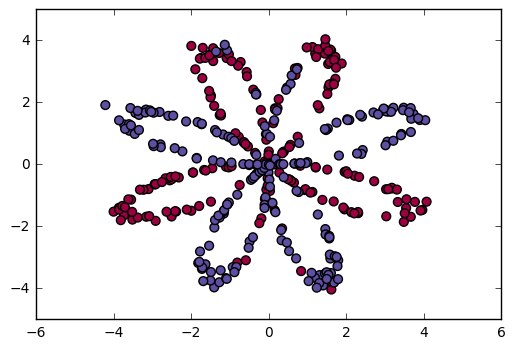

In [5]:
X, Y = load_planar_dataset()
print (X.shape)
print (Y.shape)
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [6]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2L, 400L)
The shape of Y is: (1L, 400L)
I have m = 400 training examples!


## 3. 简单逻辑回归
在构建一个完全的神经网络之前，我们先看看逻辑回归如何运用在这个问题上，可以使用sklearn的内置函数来做，执行下面的代码来训练一个逻辑回归分类器在这个数据集上。

In [7]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

D:\softpath\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


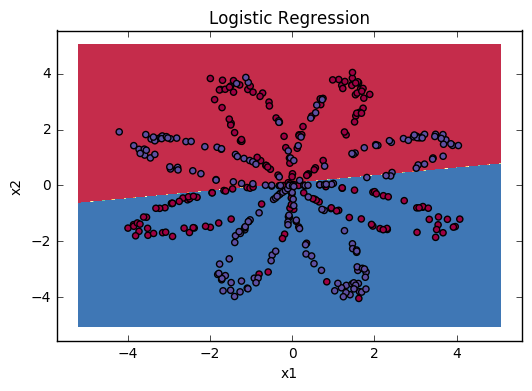

In [8]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

## 4 神经网络模型
逻辑回归在上面的花形数据上分类效果并不是很好，你可以继续训练一个单隐层神经网络。

提示：通常的建立一个神经网络的方法为：
1. 定义神经网络的结构（输入单元，隐藏单元等）
2. 初始化模型的参数
3. 循环：
   > 实现正向传播
   > 计算损失
   > 实现反向传播得到梯度值
   > 更新参数，使用梯度下降法

通常创建一个辅助函数来计算1-3步，并且把这些步骤都融合到一个函数中，nn_model()。 一旦你创建好了这个函数并且学习了正确的参数，那么你就可以对新的数据进行预测。

### 4.1 定义神经网络的结构
练习：定义三个变量：
    > n_x:输入层的大小
    > n_h:隐藏层的大小，设置为4
    > n_y:输出层的大小 
 
实践：使用X Y的shape方法获得n_x,n_y的值，硬编码隐藏层大小为4

In [9]:
# GRADED FUNCTION: layer_sizes  定义神经网络的大小，通过传入参数为X Y的函数

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0]  # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [10]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


### 4.2 初始化参数
练习：实现函数initialize_parameters()
提示：
确保你的参数大小正确。
将使用随机值初始化权重矩阵，那么将会使用到np的random方法，你可以通过np.random.randn(a,b) * 0.01来随机初始化一个形状为(a,b)的矩阵，也可以通过 np.zeros((a,b))来初始化一个形状为(a,b)的全为0的矩阵。

*关于不能像逻辑回归一样将w初始化为0，而需要随机初始化的原因*：有隐藏层的神经网络，很重要的就是有隐藏层，这些隐藏层单元都有不同的参数，做的时同样的运算但W不同，如果将w权初始化为0，那么每个单元计算出来的结果是一样的，并且反向传播时，每个单元的梯度值也是一样的，那么最终多个单元也就相当于一个，并没有任何意义。

In [11]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
      
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [12]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[ 0.]]


### 4.3 循环
练习：实现正向传播函数forward_propagation()
提示：
你可以使用sigmoid()函数，是内置在jupyter notebook内的
你也可以通过np.tanh()函数，是numpy库的一部分
你必须实现的步骤是：
   1. 检索每个参数从参数字典中，即初始换参数函数的输出，通过使用parameters[".."]
   2. 实现正向传播，计算Z[1],A[1],Z[2] and A[2] （所有关于训练集中所有实例的预测的向量）
   
反向传播需要使用到的值为存储在cache缓存中，你这缓存会作为反向传播的输入。

In [13]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [14]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

(-0.00049975577774199022, -0.00049696335323177901, 0.00043818745095914658, 0.50010954685243103)


目前已经得到在初始化参数的作用下，经过一次正向传播每一个训练样本得到的预测值，即A2，接下来则应该计算成本，及判断在该参数下，预测结果差异。

练习：实现计算成本函数：compute_cost()
提示：使用np.multiply()和np.sum()或者直接使用np.dot()可以避免使用for循环

In [15]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
    cost = -(1.0/m)*np.sum(logprobs)
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [16]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.692919893776


最初在计算cost时，使用（1/m），最后得到0.0，原因是python计算是将1/3=0，而不是0.333333

以上正向传播的过程就都实现了，接下来实现反向传播的过程。
提示:
   反向传播通常是最难的部分，也是深度学习里最考查数学的部分。你将会使用到下面的6个等式，因为是向量化实现过程。
    
   想要计算dz1，你需要计算g[1](z[1])的导数，因为g[1]使用到tanh函数，其导数计算方法为1-a^2，所以可以用1-np.power(A1,2)

In [17]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2= A2-Y
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(1-np.power(A1,2)))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [18]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[ 0.06589489]]


接下来，实现更新规则，使用梯度下降法。你需要使用(dW1, db1, dW2, db2)来更新(W1, b1, W2, b2)这四个参数。

梯度下降法规则： θ=θ−α * d
说明：使用梯度下降法，如果有一个好的学习率，那么算法会收敛，学习率选的不好，算法结果是发散的。

In [19]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [20]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[ 0.00010457]]


### 4.4 整合
把4.1定义神经网络结构 4.2初始化参数 4.3实现正向传播，计算代价函数，反正传播，参数更新等，整合在一起，放在nn_model()这个方法里面
最后整合的结果即是根据输入X以及Y，得到使代价函数最小的经过梯度下降法更新后得到的参数w和b，就可以直接用于新的数据的预测了。

In [21]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [22]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

D:\softpath\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
planar_utils.py:34: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-4.18490824  5.33220918]
 [-7.52992365  1.24304176]
 [-4.19258815  5.32653437]
 [ 7.52990113 -1.24305412]]
b1 = [[ 2.32930765]
 [ 3.79452786]
 [ 2.33008791]
 [-3.79456262]]
W2 = [[-6033.83651418 -6008.12959572 -6033.10073461  6008.0659711 ]]
b2 = [[-52.66626868]]


### 4.5 预测
使用前面建立好的模型构建predict()函数，在预测过程中使用到正向传播。
提示：predictions = = Y prediction= 1（activation > 0.5）
如果（activation < 0.5，则为0）
即二分分类，使最后结果为1或者0，设置一个阈值。

In [23]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    # np.round()方法返回浮点数x的四舍五入值 即大于0.5为1 小于0.5为0 最后分为两类
    ### END CODE HERE ###
    
    return predictions

In [24]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.666666666667


接下里你就可以把你的模型运用到你的花形数据了。

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219457
Cost after iteration 9000: 0.218608


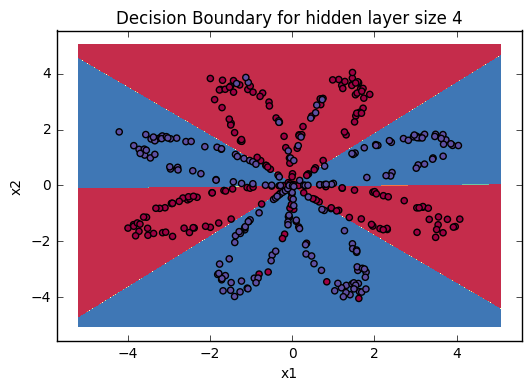

In [25]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [28]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


最后我们可以得出结论，使用隐层神经网络的分类正确率远高于逻辑回归，这个模型学习到分类最后像个花瓣的形状，神经网络学习的更好，正确率更高，并且不再像逻辑回归一样，只能学习线性决策边界。

### 4.6 调整隐藏层的大小
运行下面代码，可能需要1到两分钟，你可以观察对于不同的隐藏层大小，神经网络的学习效果不一样。

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.0 %
Accuracy for 50 hidden units: 90.25 %


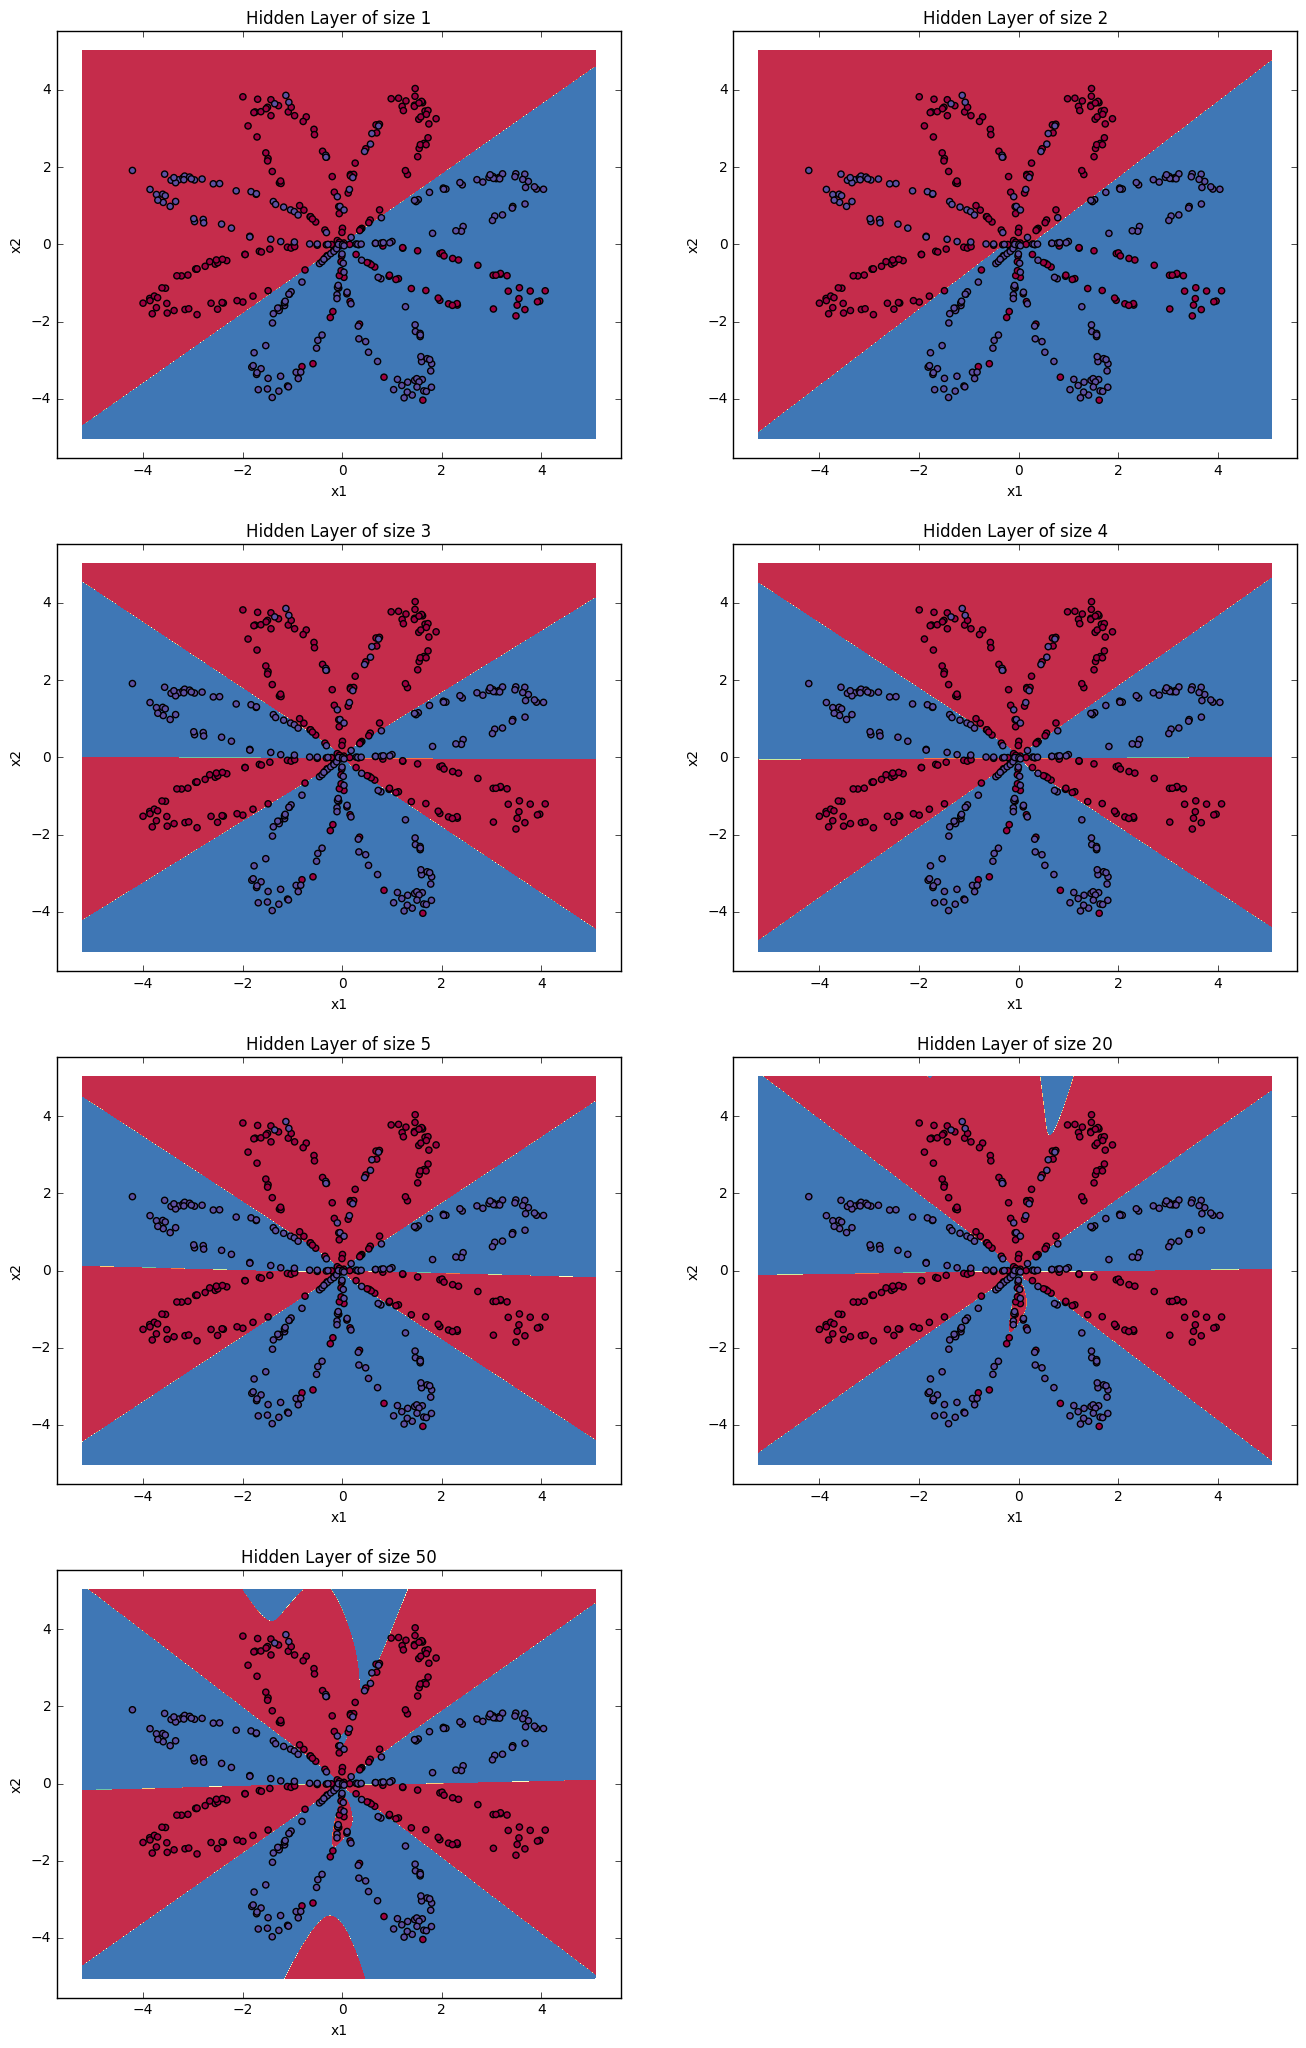

In [29]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

解释：拥有更多隐藏单元的更大的模型可以更能适应训练集，知道最终最大的模型overfit数据。
由上面的图看来，更好的隐藏单元数量看起来大约为5，的确，一个大约为5的值似乎合适（拟合）这些数据，也没有产生明显的过度拟合。
接下来你会学到关于正则化，regularization 它可以让你使用非常大的隐藏单元数而不出现过度拟合。

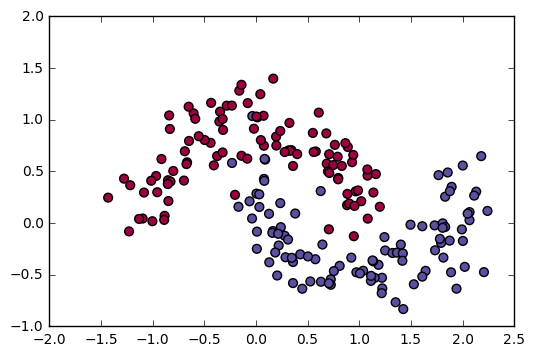

In [30]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

Cost after iteration 0: 0.692992
Cost after iteration 1000: 0.167137
Cost after iteration 2000: 0.069092
Cost after iteration 3000: 0.063716
Cost after iteration 4000: 0.061312
Cost after iteration 5000: 0.059669
Cost after iteration 6000: 0.058364
Cost after iteration 7000: 0.057279
Cost after iteration 8000: 0.056359
Cost after iteration 9000: 0.055569


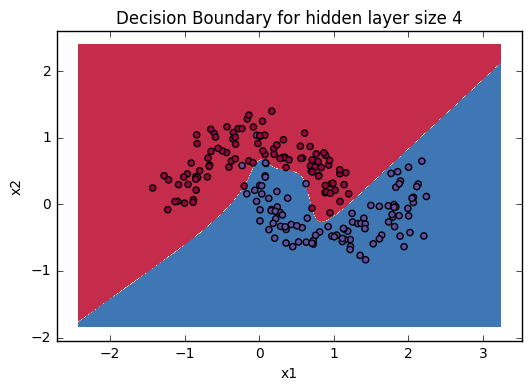

In [31]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

## 单隐藏层神经网络-----总结
对于深度神经网络模型的建立：首先很重要的是数据集，由于我们目前研究的都是监督学习，所以数据集里面对于每个样本都有特征X，以及分类结果Y，要完成一个单隐藏层神经网络的建立，还要明确隐藏层单元数量，以及我们需要的梯度下降过程迭代的次数，因此我们需要的参数设定输入的，共四个参数：

1. 训练样本特征X
2. 训练样本分类结果Y
3. 隐藏层单元数n_h
4. 迭代次数

在明确了需要输入的内容后，后面的工作都是代码完成啦，其中的工作主要有：

1. 根据数据集得到n_x，即每个样本特征个数，样本总数m，根据Y得到n_y
2. 明确神经网络的层数，从而初始化W和b参数，注意矩阵的维度要符合神经网络的结构，把所有参数放入paramters字典中
3. 正向传播，输入为X以及parameters。计算每一层的Z A值，最后记录下来最后一层的A值，并且把前面每一层的A Z 存入缓存cache中，方便反向传播过程取出来使用
4. 计算代价，输入为最后一层的A值，以及Y，计算结果得到代价cost
5. 反向传播得到梯度，即导数值，因此输入为parameters，cache，X，Y，得到grads导数值字典
6. 更新参数，传入parameters，grads，返回更新后的parameters

7. 整合，其实就是因为从正向传播到得到代价，根据代价去计算梯度值，再更新参数，再重新进行正向计算，这是一个循环，我们可以把上述3,4,5,6个过程整合在一起，使用for循环，得到最后更新好的参数parameters，这些参数使得我们建立的模型能最大程度的符合我们的数据集。
8. 根据训练好的模型得到的参数，我们就可以对新的数据集进行预测啦，当然也可以对训练数据集进行计算，再与已定的分类结果作比较，得到模型分类的正确率，predict预测的输入为parameters，X，返回计算出来的预测结果

好了，这就是对于隐藏层神经网络需要的整个流程，需要哪些参数，每个过程需要什么输入，输出什么整理清楚了。接下来开始深层神经网络编程的练习啦。